In [59]:
from itertools import permutations
import numpy as np
import sklearn
import sklearn.decomposition as dec
import sklearn.cluster as clu
import sklearn.datasets as ds
import sklearn.grid_search as gs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

X, y = ds.make_blobs(n_samples=200, n_features=2, centers=3)

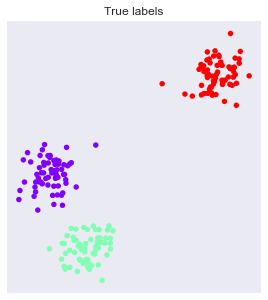

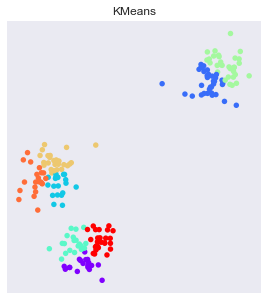

In [60]:
def relabel(cl):
    """Relabel a clustering with three clusters to match the original classes.
    """
    if np.max(cl) != 2:
        return cl
    perms = np.array(list(permutations((0, 1, 2))))
    i = np.argmin([np.sum(np.abs(perm[cl] - y)) for perm in perms])
    p = perms[i]
    return p[cl]

def display_clustering(labels, title):
    """plot the data points with the cluster colors.
    """
    # we relabel the classes when there are 3 clusters.
    labels = relabel(labels)
    # display the points with the true laels on the left, and with the clustering labels on the right
    for i, (c, title) in enumerate(zip([y, labels], ["True labels", title])):
        plt.figure(figsize=(10,5))
        plt.subplot(121 + i)
        plt.scatter(X[:,0], X[:,1], c=c, s=30, linewidths=0, cmap=plt.cm.rainbow)
        plt.xticks([]); plt.yticks([])
        plt.title(title)

km = clu.KMeans()
km.fit(X)
display_clustering(km.labels_, "KMeans")

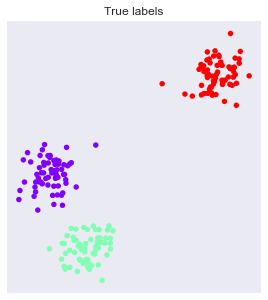

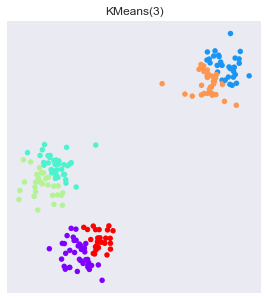

In [61]:
km = clu.KMeans(n_clusters=6)
km.fit(X)
display_clustering(km.labels_, "KMeans(3)")

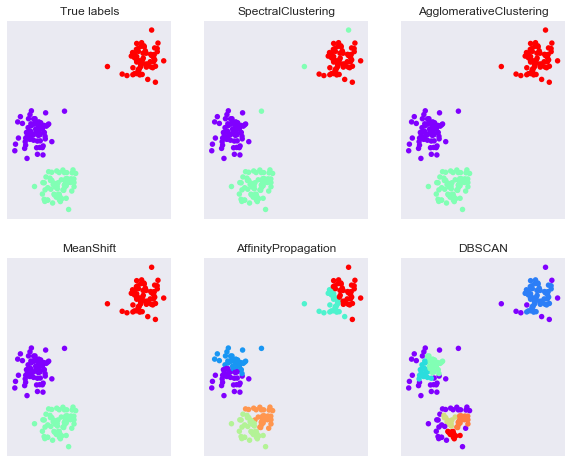

In [63]:
plt.figure(figsize=(10,8))
plt.subplot(231)
plt.scatter(X[:,0], X[:,1], c=y, s=30, linewidths=0, cmap=plt.cm.rainbow)
plt.xticks([])
plt.yticks([])
plt.title("True labels")
for i, est in enumerate([
    clu.SpectralClustering(3),
    clu.AgglomerativeClustering(3),
    clu.MeanShift(),
    clu.AffinityPropagation(),
    clu.DBSCAN(),
]):
    est.fit(X)
    c = relabel(est.labels_)
    plt.subplot(232 + i);
    plt.scatter(X[:,0], X[:,1], c=c, s=30, linewidths=0, cmap=plt.cm.rainbow)
    plt.xticks([])
    plt.yticks([])
    plt.title(est.__class__.__name__)